# Part 5: Correlation Analysis

This notebook handles:
- Calculating correlation matrix
- Visualizing correlations with heatmap
- Analyzing within-sector and cross-sector correlations


## 5.1 Setup


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 10)

pd.set_option('display.float_format', '{:.4f}'.format)



## 5.2 Load Data


In [2]:
%store -r returns_df
%store -r tech_stocks
%store -r finance_stocks
%store -r all_tickers

if 'returns_df' not in locals():
    processed_dir = Path.cwd().parent / 'data' / 'processed'
    returns_df = pd.read_csv(processed_dir / 'daily_returns.csv', index_col=0, parse_dates=True)
    tech_stocks = ['AAPL', 'MSFT', 'GOOGL']
    finance_stocks = ['JPM', 'BAC', 'GS']
    all_tickers = tech_stocks + finance_stocks
    print("✓ Data loaded from CSV files")
else:
    print("✓ Data loaded from previous notebook")

✓ Data loaded from previous notebook


## 5.3 Calculate Correlation Matrix


In [3]:
corr_matrix = returns_df.corr(method='pearson')

print("Correlation Matrix of Daily Returns:")
display(corr_matrix)

%store corr_matrix


Correlation Matrix of Daily Returns:


,AAPL,MSFT,GOOGL,JPM,BAC,GS
AAPL,1.0000,0.7116,0.6251,0.4247,0.4301,0.4859
MSFT,0.7116,1.0000,0.7047,0.4317,0.4206,0.4820
GOOGL,0.6251,0.7047,1.0000,0.4061,0.4026,0.4575
JPM,0.4247,0.4317,0.4061,1.0000,0.8849,0.8303
BAC,0.4301,0.4206,0.4026,0.8849,1.0000,0.8184
GS,0.4859,0.4820,0.4575,0.8303,0.8184,1.0000


Stored 'corr_matrix' (DataFrame)


## 5.4 Visualize Correlation Heatmap


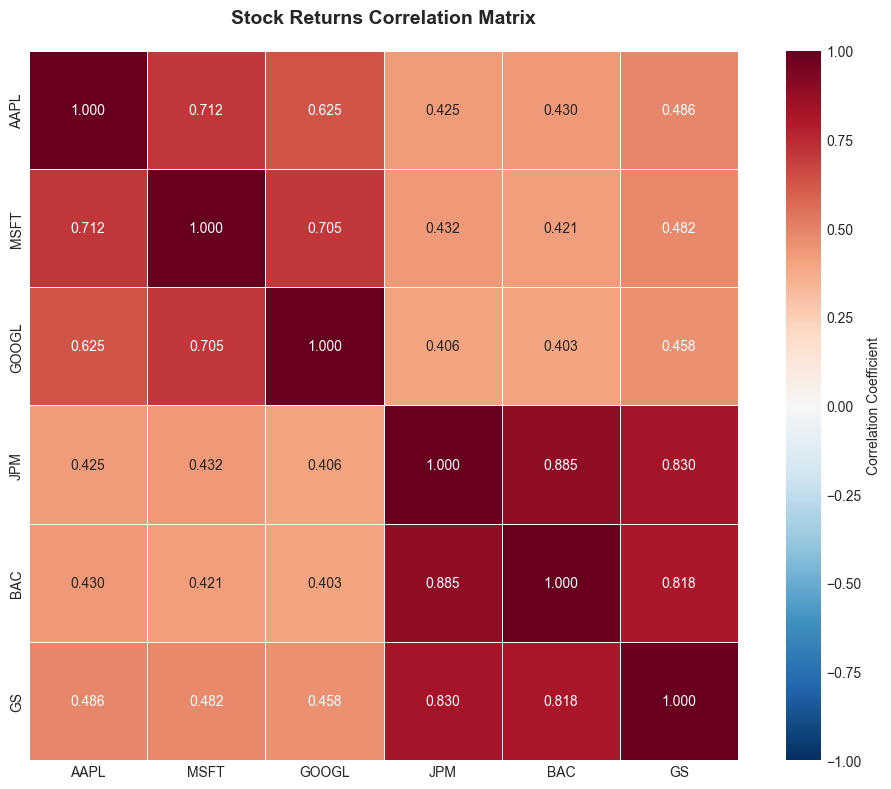

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)

ax.set_title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5.5 Sector Correlation Analysis


In [8]:
print("Correlation Analysis")

# Within Technology sector
tech_corr = corr_matrix.loc[tech_stocks, tech_stocks]
tech_upper = tech_corr.values[np.triu_indices_from(tech_corr.values, k=1)]
print(f"\nAverage correlation within Technology sector: {tech_upper.mean():.4f}")
print("Technology sector correlations:")
for i, stock1 in enumerate(tech_stocks):
    for stock2 in tech_stocks[i+1:]:
        print(f"  {stock1} - {stock2}: {corr_matrix.loc[stock1, stock2]:.4f}")

# Within Financial sector
finance_corr = corr_matrix.loc[finance_stocks, finance_stocks]
finance_upper = finance_corr.values[np.triu_indices_from(finance_corr.values, k=1)]
print(f"\nAverage correlation within Financial sector: {finance_upper.mean():.4f}")
print("Financial sector correlations:")
for i, stock1 in enumerate(finance_stocks):
    for stock2 in finance_stocks[i+1:]:
        print(f"  {stock1} - {stock2}: {corr_matrix.loc[stock1, stock2]:.4f}")

# Cross-sector correlations
cross_sector_corr = corr_matrix.loc[tech_stocks, finance_stocks]
print(f"\nAverage correlation across sectors: {cross_sector_corr.values.mean():.4f}")
print("Sample cross-sector correlations:")
for tech in tech_stocks[:2]:
    for fin in finance_stocks[:2]:
        print(f"  {tech} - {fin}: {corr_matrix.loc[tech, fin]:.4f}")




Correlation Analysis

Average correlation within Technology sector: 0.6805
Technology sector correlations:
  AAPL - MSFT: 0.7116
  AAPL - GOOGL: 0.6251
  MSFT - GOOGL: 0.7047

Average correlation within Financial sector: 0.8445
Financial sector correlations:
  JPM - BAC: 0.8849
  JPM - GS: 0.8303
  BAC - GS: 0.8184

Average correlation across sectors: 0.4379
Sample cross-sector correlations:
  AAPL - JPM: 0.4247
  AAPL - BAC: 0.4301
  MSFT - JPM: 0.4317
  MSFT - BAC: 0.4206


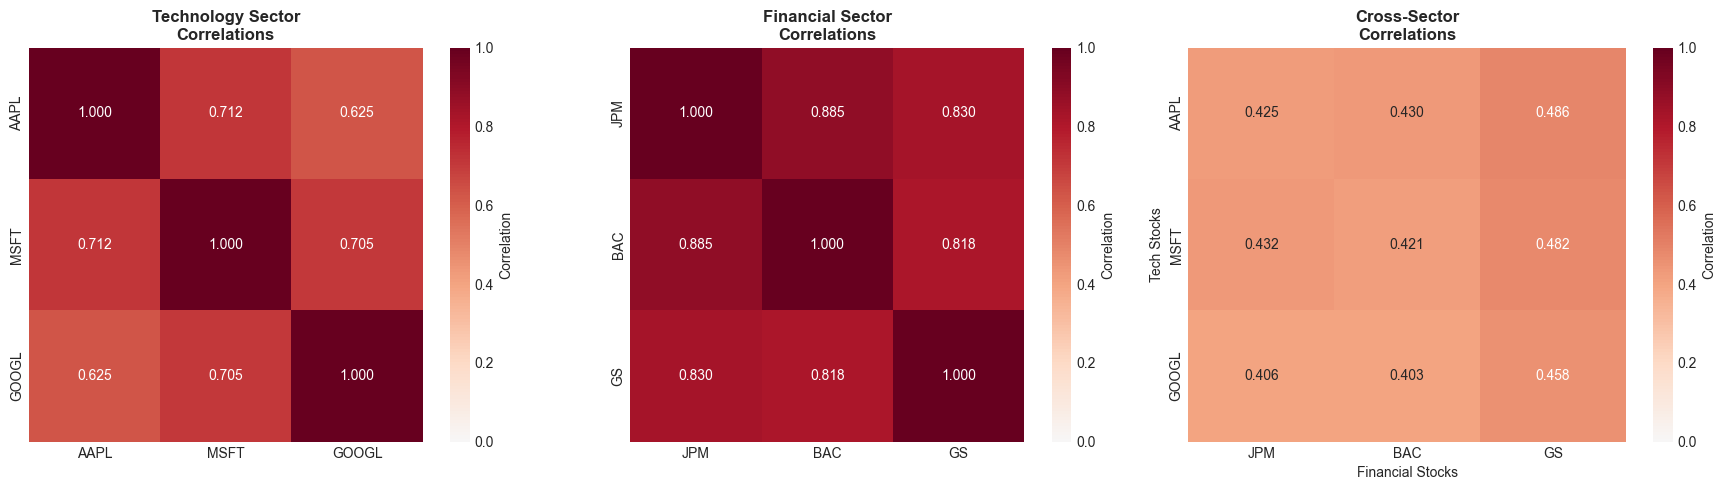

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Technology sector
sns.heatmap(tech_corr, annot=True, fmt='.3f', cmap='RdBu_r', center=0, 
            vmin=0, vmax=1, square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Technology Sector\nCorrelations', fontweight='bold')

# Financial sector
sns.heatmap(finance_corr, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            vmin=0, vmax=1, square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Financial Sector\nCorrelations', fontweight='bold')

# Cross-sector
sns.heatmap(cross_sector_corr, annot=True, fmt='.3f', cmap='RdBu_r', center=0,
            vmin=0, vmax=1, ax=axes[2], cbar_kws={'label': 'Correlation'})
axes[2].set_title('Cross-Sector\nCorrelations', fontweight='bold')
axes[2].set_xlabel('Financial Stocks')
axes[2].set_ylabel('Tech Stocks')

plt.tight_layout()
plt.show()


## 5.7 Save Correlation Heatmap


✓ Heatmap saved to /Users/mkgp3/WebstormProjects/Market Pulse Python Project/data/processed/correlation_heatmap.png


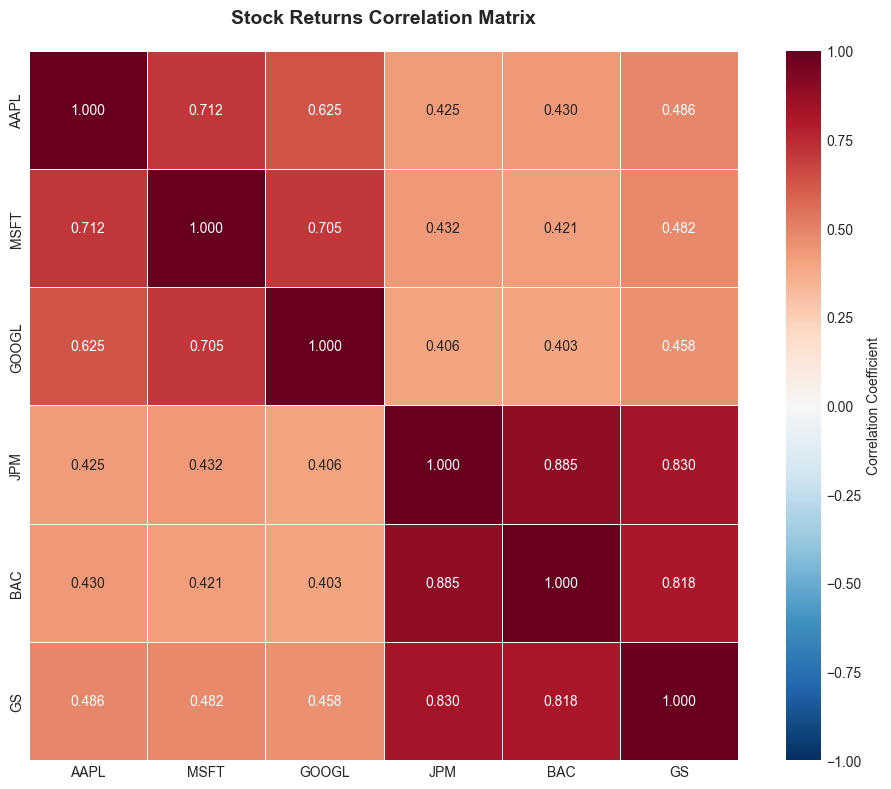

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r',
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            ax=ax)

ax.set_title('Stock Returns Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()

output_dir = Path.cwd().parent / 'data' / 'processed'
output_path = output_dir / 'correlation_heatmap.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Heatmap saved to {output_path}")
plt.show()
